<div class="alert alert-info" role="alert">
Dear Reviewer,

<br>Nice to e-meet you. Thank you for reviewing my work.

<br>Rena Bracha
</div>

Hi Rena. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

Thank you! Your project has been received.  You've done a lot of work. This is because the code doesn’t run because of error. You've already done a lot, I am sure you'll take care of it! 
    
## Review v. 2<a class="tocSkip">
    
Now your project is a true "A". Congratulations! I'm glad to say that your project has been accepted. Keep up the good work. 

# OilyGiant Mining Company Optimal Well Location Selection by Machine Learning

We will analyse data on oil quality and volume of reserves from three regions, 100,000 records in each to select the region with the highest average profit with the risk of losses lower than 2.5%. 


**Conclusion**
<br>The geo1 region has the highest potential for productivity in terms of the volume of reserves, which translates to the highest potential revenue. The negative profit margin is around 4.00 USD and is negligible. 

## Tables of Contents <a class="anchor" id="table_of_contents"></a>

* [Data Loading](#chapter1)
    * [Libraries](#section_1_1)
    * [Data Files](#section_1_2)
    * [Exploratory Data Analysis](#section_1_3)
    * [Conclusion](#section_1_4)
* [Data Preparation](#chapter2)
    * [Splitting of Data](#section_2_1)
    * [Standardisation](#section_2_2)
    * [Identification and Removal of Outliers](#section_2_3)
    * [Conclusion](#section_2_4)
* [Sanity Check](#chapter3)
* [Model Training](#chapter4)
* [Preparation for Profit Calculation](#chapter5)
* [Write a function to calculate profit from a set of selected oil wells and model predictions.](#chapter6)
* [Calculate risks and profit for each region.](#chapter7)
* [Overall Conclusion](#chapter8)

## Data Loading <a class="anchor" id="chapter1"></a>

[Go back to the Table of Contents](#table_of_contents)

### Libraries <a class="anchor" id="section_1_1"></a>

[Go back to the Table of Contents](#table_of_contents)

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please fix the error below (code doesn't run). "ModuleNotFoundError: No module named 'sklearn.neighbors._base"?
</div>

<div class="alert alert-info" role="alert">
<b>Student comment</b>

Yes, imblearn is problematic for me, too. So, as I had attached a note in the Libraries section ("# restart the kernel after running the installation so as not to get errors issued that sklearn.neighbor._base does not exist"), please restart the kernel when you get the error, then execute the cell of the list of libraries again. That is how it gets sorted out for me. 

</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, now it works:)
</div>

In [1]:
# import sys so no warnings will be issued
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# various libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth
from numpy import sqrt
from numpy import argmax
from numpy import mean

# sidetable utility package
!pip install sidetable
import sidetable


# for graph and chart plotting
import matplotlib.pyplot as plt
#!pip install -U seaborn
!pip install seaborn --upgrade
#!sudo pip3 install seaborn
#!pip install seaborn=0.11.2
import seaborn as sns

# for spliting the dataset for training, validation and testing
from sklearn.model_selection import train_test_split

# import the scikit-learn module for calculating various performance metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

# install imbalanced-learn library
# restart the kernel after running the installation so as not to get errors issued that sklearn.neighbor._base does not exist
!pip install -U scikit-learn
!pip install -U imbalanced-learn
#from imblearn.ensemble import EasyEnsembleClassifier
#from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# for optimising hyperparameter
from sklearn.model_selection import GridSearchCV

# various classiers 
from sklearn.dummy import DummyClassifier # dummy classifier as a baseline
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.linear_model import LogisticRegression # logistic regression classifier
from sklearn.ensemble import BaggingClassifier # Bagging classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor # dummy regressor as a baseline
from sklearn.linear_model import LinearRegression # linear regression classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# for label encoding
from sklearn.preprocessing import OrdinalEncoder

# for feature scaling by standardising the data
from sklearn.preprocessing import StandardScaler 

# for feature selection 
from sklearn.feature_selection import chi2 # categorical variables

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 1.5 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (1.0)
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 189 kB 1.1 MB/s eta 0:00:01


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

### Data Files <a class="anchor" id="section_1_2"></a>

[Go back to the Table of Contents](#table_of_contents)

In [2]:
# enable data file loading in two environments: one local and one on the Platform
# automatically detect the delimiter in the csv file
# load the first 500 rows for starters
try:
    geo0 = pd.read_csv('geo_data_0.csv', sep = ',', nrows=500)
    geo1 = pd.read_csv('geo_data_1.csv', sep = ',', nrows=500)
    geo2 = pd.read_csv('geo_data_2.csv', sep = ',', nrows=500)
except:
    geo0 = pd.read_csv('/datasets/geo_data_0.csv', sep = ',', nrows=500)
    geo1 = pd.read_csv('/datasets/geo_data_1.csv', sep = ',', nrows=500)
    geo2 = pd.read_csv('/datasets/geo_data_2.csv', sep = ',', nrows=500)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done for using try-except for the path to the file.
</div>

In [3]:
# look at the first 10 rows. 
display(geo0.head(10))
display(geo1.head(10))
display(geo2.head(10))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


* There are no long text values or potential categorical values. There will be no substantial savings in memory usages by converting the data types. Let us skip data optimisation.

In [4]:
# load the data files in full
try:
    geo0= pd.read_csv('geo_data_0.csv', sep=',')
    geo1= pd.read_csv('geo_data_1.csv', sep=',')
    geo2= pd.read_csv('geo_data_2.csv', sep=',')
except:
    geo0= pd.read_csv('/datasets/geo_data_0.csv', sep=',')
    geo1= pd.read_csv('/datasets/geo_data_1.csv', sep=',')
    geo2= pd.read_csv('/datasets/geo_data_2.csv', sep=',')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok, lets move to the data analysis.
</div>

### Exploratory Data Analysis <a class="anchor" id="section_1_3"></a>

[Go back to the Table of Contents](#table_of_contents)

In [5]:
# look at the general information...
geo0.info()
print()
geo1.info()
print()
geo2.info()

# ...and the descrptive statistics
display(geo0.describe(include='all'))
display(geo1.describe(include='all'))
display(geo2.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99990,NaN,NaN,NaN,NaN
top,bsk9y,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.500419,0.250143,2.502647,92.500000
std,NaN,0.871832,0.504433,3.248248,44.288691
min,NaN,-1.408605,-0.848218,-12.088328,0.000000
25%,NaN,-0.072580,-0.200881,0.287748,56.497507
50%,NaN,0.502360,0.250252,2.515969,91.849972
75%,NaN,1.073581,0.700646,4.715088,128.564089


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,5ltQ6,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,1.141296,-4.796579,2.494541,68.825000
std,NaN,8.965932,5.119872,1.703572,45.944423
min,NaN,-31.609576,-26.358598,-0.018144,0.000000
25%,NaN,-6.298551,-8.267985,1.000021,26.953261
50%,NaN,1.153055,-4.813172,2.011479,57.085625
75%,NaN,8.621015,-1.332816,3.999904,107.813044


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,xCHr8,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.002023,-0.002081,2.495128,95.000000
std,NaN,1.732045,1.730417,3.473445,44.749921
min,NaN,-8.760004,-7.084020,-11.970335,0.000000
25%,NaN,-1.162288,-1.174820,0.130359,59.450441
50%,NaN,0.009424,-0.009482,2.484236,94.925613
75%,NaN,1.158535,1.163678,4.858794,130.595027


* Geological exploration data for the three regions:
<br>o geo0: 100000 observations
<br>o geo1: 100000 observations
<br>o geo2: 100000 observations

* 1 target: 
<br>o product — volume of reserves in the oil well (in units of thousand barrels)

* 4 features:
<br>o id — unique oil well identifier
<br>o f0, f1, f2 — three features of points. 
<br>Note: we are working blindly here with not being able to look up any expert knowledge as to what these feature could be and if their values lie within logical ranges. 


* No missing values in any of the files.

* In terms of descriptive statistics, geo1 is the odd one out. The data are on a slightly different scale than geo1 and geo3, which are are more similar to each other. 


**Clean the dataset**
<br>...of the following observations that do not contribute to or, worse, negatively affect the learning process of the models to make sure that the observations best represent the problem: 
* irrelevant variables: identify variables to remove from the dataset which are clearly not going to provide useful information to predict the target to save computational resources and time and facilitate the model's learning process
* complete duplicates: the higher frequency of one record may tilt the balance towards it unfairly and unnecessarily


**Get an idea of data distribution and correlation**
<br>Check the data distribution in each feature to see if it is Gaussian. Check if there is a linear relationship or some kind of correlation between features, and between a feature and the target variable. 


Note: outliers will be handled later.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
It's great that you analysed data in details.
</div>

**Irrelevant variables**

'id' is a non-numeric variable that does not provide useful information to the models in figuring out the productivity of a well, so we are removing it. 

In [6]:
# create a data slice from each dataset that excludes 'id'
geo0_1 = geo0.drop(['id'], axis=1)
geo1_1 = geo1.drop(['id'], axis=1)
geo2_1 = geo2.drop(['id'], axis=1)
display(geo0_1.head())
display(geo1_1.head())
display(geo2_1.head())

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


**Complete duplicates**

Check if there are complete duplicates.

In [7]:
geo0_1.duplicated().sum()
geo1_1.duplicated().sum()
geo2_1.duplicated().sum()

0

No complete duplicates.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, we don't have duplicates in our data.
</div>

**Feature distribution and correlation**

Let us check the distribution of each individual feature and the correlation of one feature to another as well to the target variable. We will use both a scatter plot and a correlation heatmap. We will check for outliers as well while we are at it. 

= geo0 dataset =

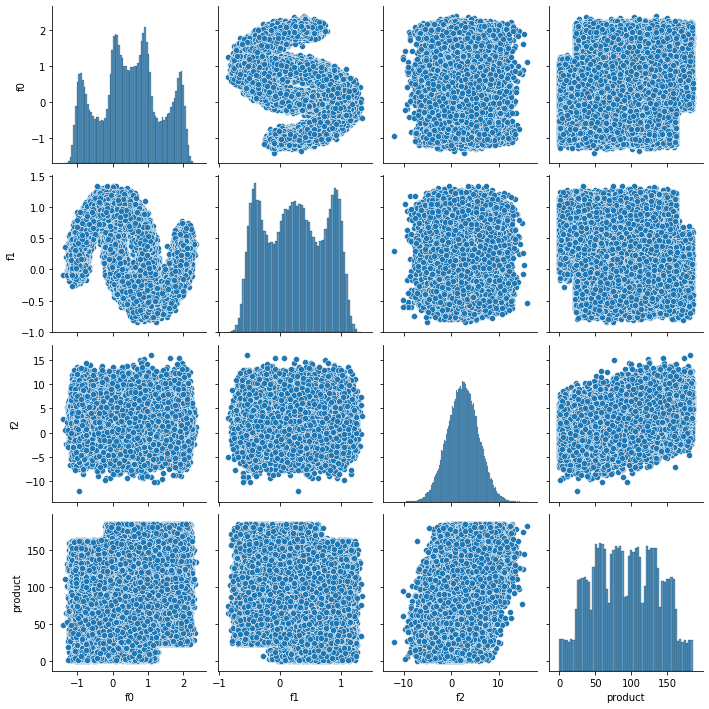

In [8]:
# draw the scatter plots to see the multivariate distribution of the features and the target
sns.pairplot(geo0_1)
plt.show();

* 'f0', 'f1' and 'product' have distributions that are skewed and not Gaussian. 'f2' is the only one with a normal distribution. To improve our prediction performance, we will apply normalisation on the data later. 
* There seems to be a linear correlation between 'f2' and 'product'. 
* There are some outliers. We will carefully examine and remove the outliers that will affect negatively on model learning.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You are right, we have an outliers and it's necessary to remove them before model training.
</div>

Let us look more closely into the correlations among the features and with the target in a heatmap. We are specifying the Spearman’s correlation for generating the heatmap since the data distributions are not Gaussian. The ranges of correlation strength between two features are defined as follows:
<br>o 0.9 to 1.0 (-0.9 to -1.0) - very high positive (negative) correlation
<br>o 0.7 to 0.9 (-0.7 to -0.9) - high positive (negative) correlation
<br>o 0.5 to 7.0 (-0.5 to -7.0) - moderately positive (negative) correlation
<br>o 0.3 to 0.5 (-0.3 to -0.5) - low positive (negative) correlation
<br>o 0.0 to 0.3 (-0.0 to -0.3) - negligible correlation

We will be looking out for multicollinearity between feature-pairs as well. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You correctly noted one of the important problems in feature selection for building models is collinearity/multicollinearity of the variables.

Additional materials: https://www.greenbook.org/marketing-research/cluster-analysis
</div>

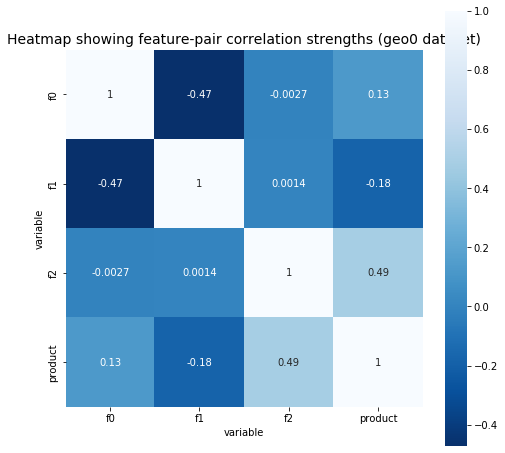

In [9]:
# draw up a correlation heatmap
correlation = geo0_1.corr(method='spearman')
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues_r') 
plt.title("Heatmap showing feature-pair correlation strengths (geo0 dataset)", fontsize=14)
plt.ylabel("variable")
plt.xlabel("variable");

* No one feature has a strong correlation with the target.
* 'f0' has a weak positive, and 'f2' has a moderately positive correlation with the target. 
* 'f0' and 'f1' have a moderately negative correlation with each other. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

= geo1 dataset =

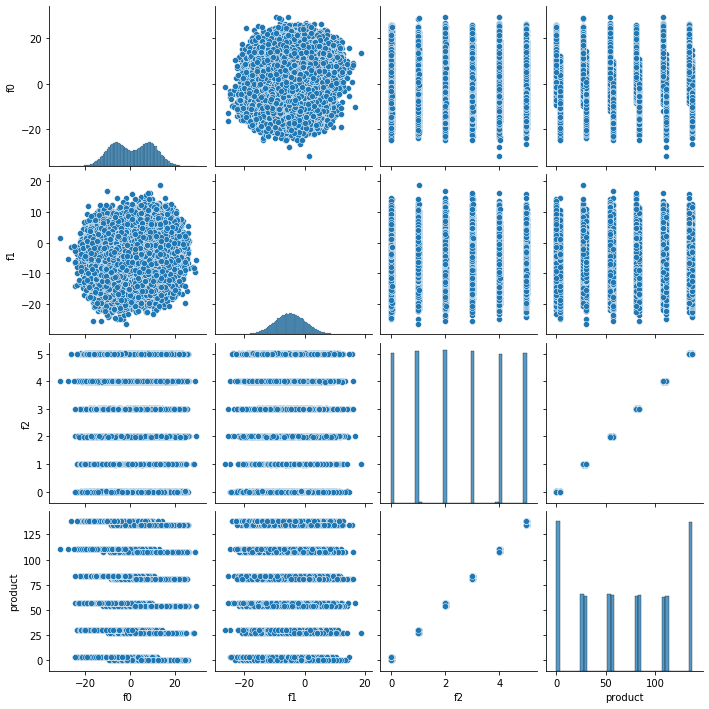

In [10]:
# draw the scatter plots to see the multivariate distribution of the features and the target
sns.pairplot(geo1_1)
plt.show();

* As we saw in the descriptive statistics, geo1 is very different from geo0 and geo2. 
* 'f0', 'f2' and 'product' have distributions that are skewed and not Gaussian. We will apply normalisation on the data later to improve the model performance. 'f1' has a normal distribution. 
* 'f2' and 'product' are very strongly correlated. Hopefully, 'f2' will act as a powerful predictor. 
* Neither 'f0' nor'f1' is corrected with the target. One variable stays constant while the other changes. The values of 'f0' occur and are concentrated at certain 'product' data points. The same goes for 'f1'. 
* There are some outliers. We will carefully examine and remove the outliers that will affect negatively on the model learning.
* 'product' in geo1 has a reverse distribution compared to geo0 and geo2 - where there are peaks in the latter two, there are troughs in geo1 and vice versa. 

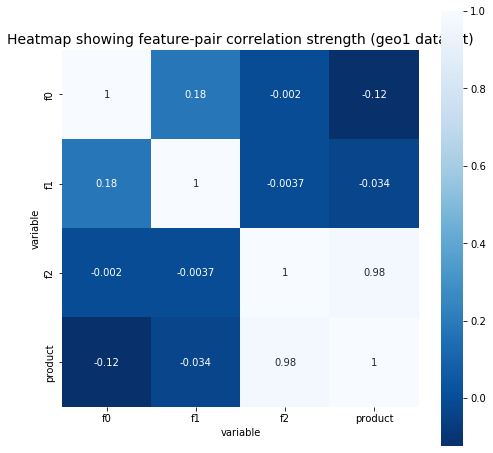

In [11]:
# draw up a correlation heatmap
correlation = geo1_1.corr(method='spearman')
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues_r') 
plt.title("Heatmap showing feature-pair correlation strength (geo1 dataset)", fontsize=14)
plt.ylabel("variable")
plt.xlabel("variable");

* The heatmap confirms the very strong positive correlation between 'f2' and 'product we saw earlier.
* No two features are particularly correlated with one another. 'f0' and 'f1' have a negligible positive correlationto one another. 

= geo2 dataset =

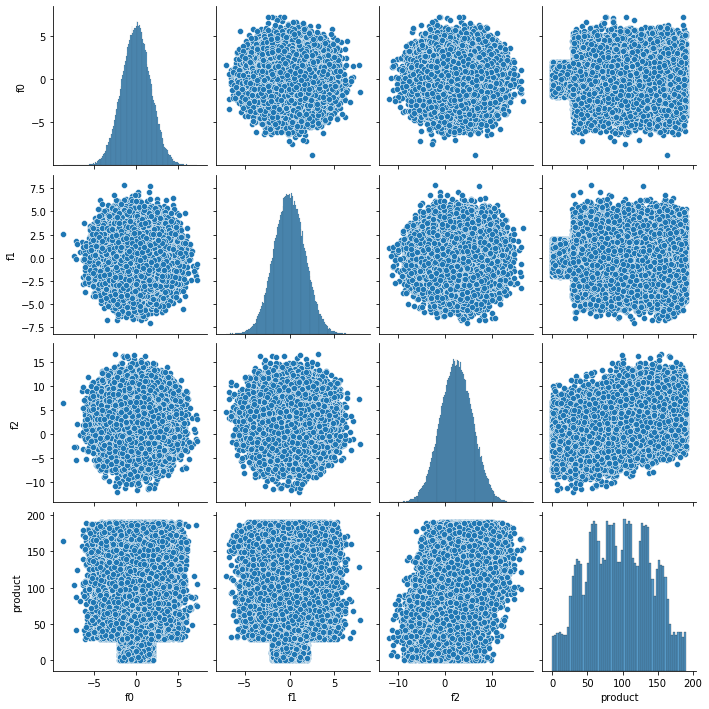

In [12]:
# draw the scatter plots to see the multivariate distribution of the features and the target
sns.pairplot(geo2_1)
plt.show();

* The distributions of the features, and the target to a certain extent, are Gaussian. 
* No two features are correlated significantly to each other. 
* 'f2' and 'product' seem to show a linear correlation with one another. 
* There are some outliers. We will carefully examine and remove the outliers that will affect negatively on the model learning.

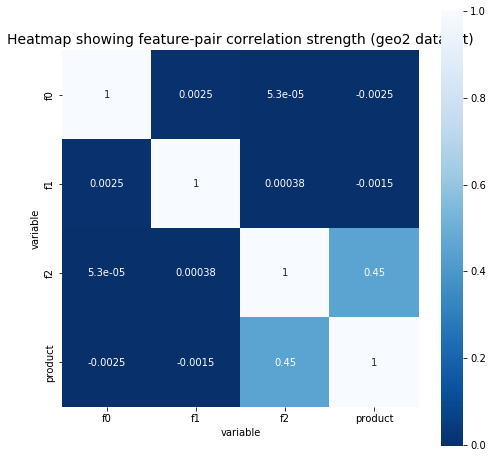

In [13]:
# draw up a correlation heatmap
correlation = geo2_1.corr(method='spearman')
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues_r') 
plt.title("Heatmap showing feature-pair correlation strength (geo2 dataset)", fontsize=14)
plt.ylabel("variable")
plt.xlabel("variable");

* 'f2' has a moderate positive correlation with the target. 
* No two features are particularly correlated with one another. 

### Conclusion <a class="anchor" id="section_1_4"></a>

[Go back to the Table of Contents](#table_of_contents)

* 'id' was removed to reduce the computational cost and memory usage since it does cotribute any useful information to the model learning. 

* No complete duplicates were identified in any of the three datasets.

* Some outliers were observed in almost all the feature-pairs. The topic will be revisted later for more in-depth examination on the premise to remove them since we will be using linear regression, which is susceptible to outliers. 

* 'f2' is the only independent variable to show a certain to even a strong degree of correlation to 'product', the dependent variable. The correlation was most strong in the geo1 dataset. It is expected to provide a clear guidance during the model training. 

* Most features who non-Gaussian distributions. We will be standardising them to help raise the model quality. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, standartization is a really good idea.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You have made a perfect data analysis :)
</div>

## Data Preparation <a class="anchor" id="chapter2"></a>

[Go back to the Table of Contents](#table_of_contents)

### Splitting of Data <a class="anchor" id="section2_1"></a>

[Go back to the Table of Contents](#table_of_contents)

We are to split the data into a training set and a validation set at a ratio of 75:25. 

In [14]:
# write a function that takes the source dataset and the name of the target variable, and
# splits into training and validation datasets in the specified proportions
def split_data(source, target_col, train_portion):

        # separate the source dataset into features and target datasets
        features = source.drop([target_col], axis=1)
        target = source[target_col]    
        
        # split the features and target datasets into training and validation datasets 
        features_train, features_valid, target_train, target_valid = \
            train_test_split(features, target, train_size=train_portion, random_state=12345)    

        # return all the datasets
        return features_train, features_valid, target_train, target_valid

In [15]:
# split the geo0 dataset
features_train0, features_valid0, target_train0, target_valid0 = split_data(geo0_1, 'product', 0.75)
print('geo0 - features_train:', features_train0.shape[0], ', target_train:,', target_train0.shape[0], '- features_valid:', features_valid0.shape[0], ', target_valid,', target_valid0.shape[0])

# split the geo1 dataset
features_train1, features_valid1, target_train1, target_valid1 = split_data(geo1_1, 'product', 0.75)
print('geo1 - features_train:', features_train1.shape[0], ', target_train:,', target_train1.shape[0], '- features_valid:', features_valid1.shape[0], ', target_valid,', target_valid1.shape[0])

# split the geo2 dataset
features_train2, features_valid2, target_train2, target_valid2 = split_data(geo2_1, 'product', 0.75)
print('geo2 - features_train:', features_train2.shape[0], ', target_train:,', target_train2.shape[0], '- features_valid:', features_valid2.shape[0], ', target_valid,', target_valid2.shape[0])

geo0 - features_train: 75000 , target_train:, 75000 - features_valid: 25000 , target_valid, 25000
geo1 - features_train: 75000 , target_train:, 75000 - features_valid: 25000 , target_valid, 25000
geo2 - features_train: 75000 , target_train:, 75000 - features_valid: 25000 , target_valid, 25000


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
The data is splitted, well done that you fixed random_state. It's important for reproducibility of results.
</div>

### Standardisation <a class="anchor" id="section2_2"></a>

[Go back to the Table of Contents](#table_of_contents)

We saw in the scatter plots that most of the features show non-Gaussian distributions. Let us standardise the data in the three datasets to a Z-score with zero mean and unit variance so we will be able to deploy methods of identifying outliers. Later on, our prediction performance will benefit from the standardisation, too, since models tend to learn better when the data is standardised. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you correctly noted that most of the features show non-Gaussian distributions. It's a good idea to use  a Z-score for standartization.
    
Maybe this link will be interesting for you: https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html
</div>

In [16]:
# silence SettingWithCopyWarning that may arise from standardising features
pd.options.mode.chained_assignment = None

In [17]:
# geo0 dataset - create an instance of the class and tune it with the training subset for each dataset
scaler0 = StandardScaler()
scaler0.fit(features_train0) 

# then apply the transformation to the training and validation datasets
features_train_norm0 = scaler0.transform(features_train0)
features_valid_norm0 = scaler0.transform(features_valid0) 


# geo1 dataset - create an instance of the class and tune it with the training subset for each dataset
scaler1 = StandardScaler()
scaler1.fit(features_train1) 

# then apply the transformation to the training and validation datasets
features_train_norm1 = scaler1.transform(features_train1)
features_valid_norm1 = scaler1.transform(features_valid1) 


# geo2 dataset - create an instance of the class and tune it with the training subset for each dataset
scaler2 = StandardScaler()
scaler2.fit(features_train2) 

# then apply the transformation to the training and validation datasets
features_train_norm2 = scaler2.transform(features_train2)
features_valid_norm2 = scaler2.transform(features_valid2)

<div class="alert alert-info" role="alert">
<b>Note to the Reviewer: </b>
I did not scale the target variable because I read on the WWW that there is no need to do so unless it is very large or it is of f32 data type where the motivation is to reduce memory usage and computation cost. Neither is the case for the 'product' variable in this project. 
    
    
I scaled the feature variables, but not the target variable. So I will not need to denormalise the predictions that the models will output.

       
<br>Please correct me if I should scale the target variable as well.   
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>

### Identification and Removal of Outliers <a class="anchor" id="section2_3"></a>

[Go back to the Table of Contents](#table_of_contents)

The project instruction specifically tells us to use linear regression only. Since linear regression is easily impacted by outliers, and let us invest some effort into dealing with outliers.

We observed some outliers in the scatter plots. The presence of outliers can downgrade the prediction performance. Let us try several methods of identifying outliers and remove those data points that are truly outliers so we delete minimum necessary amount of data. We will choose the method with the best outcome at the end. 


With the names of the features hidden and without the expert knowledge, it is true that we do not know for sure if the "out of the way" data points are really outliers. However, as we will see in the sanity check, the dummy regressor performs better on the datasets without outliers than on those with. So it seems that the effort of removing outliers is worth it to raise the performance of the real model. 

<div class="alert alert-info" role="alert">
<b>Note to the Reviewer: </b>

Outliers are removed only from the training dataset and not from the validation dataset since our model needs to be able to cope and handle the validation dataset (in the absence of a test dataset in this case) which supposedly reflects the real world situation where we the data scientists will not be able to intervene and curate the data by removing outliers in every case. 
    
  
<br>Please correct me if my understanding is incorrect.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, it's a good approach :) You have noted correctly that in case of linear models (for example, linear regression) an outliers have influence on the model. However, in case of Decision Tree based models it's not necessary to remove an outliers.
</div>

In [18]:
# convert the array to a dataframe to be able to see each feature separately when plotting boxplots later on
# geo0 dataset
col_names = features_train0.columns
features_train_norm_df0 = pd.DataFrame(features_train_norm0, columns=col_names)

# geo1 dataset
col_names = features_train1.columns
features_train_norm_df1 = pd.DataFrame(features_train_norm1, columns=col_names)

# geo2 dataset
col_names = features_train2.columns
features_train_norm_df2 = pd.DataFrame(features_train_norm2, columns=col_names)

**Method 1: Standard Deviation method (traditional)**

We can calculate the mean and standard deviation of the training dataset, then identify and filter out as outliers those data points that are more than 3 standard devitations away from the mean. Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. 

In [19]:
threshold = 3

# remove outliers from geo0 training dataset
features_train_norm_df_std0 = features_train_norm_df0[np.abs(features_train_norm_df0-features_train_norm_df0.mean())<=(threshold*features_train_norm_df0.std())]

# remove outliers from geo1 training dataset
features_train_norm_df_std1 = features_train_norm_df1[np.abs(features_train_norm_df1-features_train_norm_df1.mean())<=(threshold * features_train_norm_df1.std())]

# remove outliers from geo2 training dataset
features_train_norm_df_std2 = features_train_norm_df2[np.abs(features_train_norm_df2-features_train_norm_df2.mean())<=(threshold * features_train_norm_df2.std())]

**Method 2: Isolation Forest (a.k.a. iForest)**

This is a tree-based anomaly detection algorithm whereby the normal data are modeled in such a way that anomalous data points are isolated as few in number as possible and spreading them out in different feature spaces.

We will experiement with different values of 'contamination' hyperparameter until we reach an appropriate estimation of outliers in each dataset. 

In [20]:
from sklearn.ensemble import IsolationForest
state = np.random.RandomState(12345)

# remove outliers from geo0 training dataset
geo0_iso = IsolationForest(random_state=state, contamination=0.3) # using the default value for all hyperparameters
iso_pred0 = geo0_iso.fit_predict(features_train_norm_df0)
geo0_mask = iso_pred0!=-1 # get the data points that are not marked as outliers
features_train_norm_df_iso0 = features_train_norm_df0[geo0_mask]

# remove outliers from geo1 training dataset
geo1_iso = IsolationForest(random_state=state, contamination=0.3) # using the default value for all hyperparameters
iso_pred1 = geo1_iso.fit_predict(features_train_norm_df1)
geo1_mask = iso_pred1!=-1 # get the data points that are not marked as outliers
features_train_norm_df_iso1 = features_train_norm_df1[geo1_mask]

# remove outliers from geo2 training dataset
geo2_iso = IsolationForest(random_state=state, contamination=0.3) # using the default value for all hyperparameters
iso_pred2 = geo2_iso.fit_predict(features_train_norm_df2)
geo2_mask = iso_pred2!=-1 # get the data points that are not marked as outliers
features_train_norm_df_iso2 = features_train_norm_df2[geo2_mask]

**Method 3: Minimum Covariance Determinant (a.k.a. MCD)**

This is a statistical method that takes two features at a time and identifies values that are far from the multi-dimensional Gaussian distribution that the two feature spaces form together, provided that the features are Gaussian to start with. 

The multi-dimensional Gaussian distribution is defined as an ellipsoid hypersphere that covers the normal data, and the data points that fall outside that space are considered outliers. 

We will experiement with different values of 'contamination' hyperparameter until we reach an appropriate estimation of outliers in each dataset. 

In [21]:
from sklearn.covariance import EllipticEnvelope
state = np.random.RandomState(12345)

# remove outliers from geo0 training dataset
geo0_ee = EllipticEnvelope(random_state=state, contamination=0.05)
ee_pred0 = geo0_ee.fit_predict(features_train_norm_df0)
geo0_mask = ee_pred0!=-1 # get the data points that are not marked as outliers
features_train_norm_df_ee0 = features_train_norm_df0[geo0_mask]

# remove outliers from geo1 training dataset
geo1_ee = EllipticEnvelope(random_state=state, contamination=0.05)
ee_pred1 = geo1_ee.fit_predict(features_train_norm_df1)
geo1_mask = ee_pred1!=-1 # get the data points that are not marked as outliers
features_train_norm_df_ee1 = features_train_norm_df1[geo1_mask]

# remove outliers from geo2 training dataset
geo2_ee = EllipticEnvelope(random_state=state, contamination=0.05)
ee_pred2 = geo2_ee.fit_predict(features_train_norm_df2)
geo2_mask = ee_pred2!=-1 # get the data points that are not marked as outliers
features_train_norm_df_ee2 = features_train_norm_df2[geo2_mask]

**Method 4: Local Outlier Factor (a.k.a. LOF)**

This is an application of the "nearest neighbours" concept to outlier detection. Each data point is rated how isolated it is, relative to the size of its local neighbourhood. The larger the score, the higher the likehood of a data point being an outlier. 

We will experiement with different values of 'contamination' hyperparameter until we reach an appropriate estimation of outliers in each dataset. 

In [22]:
from sklearn.neighbors import LocalOutlierFactor

# remove outliers from geo0 training dataset
geo0_lof = LocalOutlierFactor(contamination=0.5) # maximum value possible reached
lof_pred0 = geo0_lof.fit_predict(features_train_norm_df0)
geo0_mask = lof_pred0!=-1 # get the data points that are not marked as outliers
features_train_norm_df_lof0 = features_train_norm_df0[geo0_mask]

# remove outliers from geo1 training dataset
geo1_lof = LocalOutlierFactor(contamination=0.5)
lof_pred1 = geo1_lof.fit_predict(features_train_norm_df1)
geo1_mask = lof_pred1!=-1 # get the data points that are not marked as outliers
features_train_norm_df_lof1 = features_train_norm_df1[geo1_mask]

# remove outliers from geo2 training dataset
geo2_lof = LocalOutlierFactor(contamination=0.5)
lof_pred2 = geo2_lof.fit_predict(features_train_norm_df2)
geo2_mask = lof_pred2!=-1 # get the data points that are not marked as outliers
features_train_norm_df_lof2 = features_train_norm_df2[geo2_mask]

**Method 5: One-class SVM**

When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as One-Class SVM.

Although SVM is a classification algorithm and One-Class SVM is also a classification algorithm, it can be used to discover outliers in input data for both regression and classification datasets.

We will experiement with different values of 'nu' hyperparameter until we reach an appropriate estimation of outliers in each dataset. 

In [23]:
from sklearn.svm import OneClassSVM

# remove outliers from geo0 training dataset
geo0_svm = OneClassSVM(nu=0.07)
svm_pred0 = geo0_svm.fit_predict(features_train_norm_df0)
geo0_mask = svm_pred0!=-1
features_train_norm_df_svm0 = features_train_norm_df0[geo0_mask]

# remove outliers from geo1 training dataset
geo1_svm = OneClassSVM(nu=0.07)
svm_pred1 = geo1_svm.fit_predict(features_train_norm_df1)
geo1_mask = svm_pred1!=-1
features_train_norm_df_svm1 = features_train_norm_df1[geo1_mask]

# remove outliers from geo2 training dataset
geo2_svm = OneClassSVM(nu=0.07)
svm_pred2 = geo2_svm.fit_predict(features_train_norm_df2)
geo2_mask = svm_pred2!=-1
features_train_norm_df_svm2 = features_train_norm_df2[geo2_mask]

In [24]:
# check the number of outliers removed by each method

# geo0 dataset
print('geo0 training dataset - number of observations')
print('before outlier removal:', features_train_norm_df0.shape[0])
print('after outlier removal')
print('standard deviation method:', features_train_norm_df_std0.shape[0])
print('isolation forest method:', features_train_norm_df_iso0.shape[0])
print('minimum covariance determinant method:', features_train_norm_df_ee0.shape[0])
print('local outlier factor method:', features_train_norm_df_lof0.shape[0])
print('one-class svm method:', features_train_norm_df_svm0.shape[0])

# Note: the OneClassSVM classifier takes a good few minutes to run. 

geo0 training dataset - number of observations
before outlier removal: 75000
after outlier removal
standard deviation method: 75000
isolation forest method: 52500
minimum covariance determinant method: 71250
local outlier factor method: 37500
one-class svm method: 69749


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

geo0 training dataset - number of observations


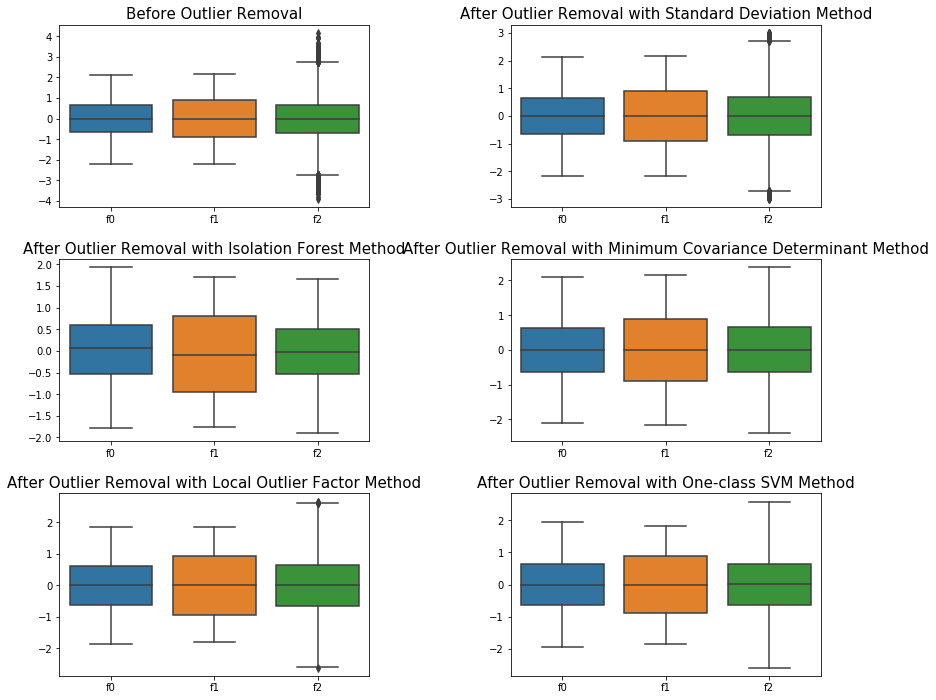

In [25]:
# compare the distributions before and after the removal of outliers by boxplots

# geo0 dataset
print('geo0 training dataset - number of observations')
plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
sns.boxplot(data=features_train_norm_df0)
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
sns.boxplot(data=features_train_norm_df_std0)
plt.title('After Outlier Removal with Standard Deviation Method', size=15)

plt.subplot(3,2,3)
sns.boxplot(data=features_train_norm_df_iso0)
plt.title('After Outlier Removal with Isolation Forest Method', size=15)

plt.subplot(3,2,4)
sns.boxplot(data=features_train_norm_df_ee0)
plt.title('After Outlier Removal with Minimum Covariance Determinant Method', size=15)

plt.subplot(3,2,5)
sns.boxplot(data=features_train_norm_df_lof0)
plt.title('After Outlier Removal with Local Outlier Factor Method', size=15)

plt.subplot(3,2,6)
sns.boxplot(data=features_train_norm_df_svm0)
plt.title('After Outlier Removal with One-class SVM Method', size=15)

plt.tight_layout(1.7)
plt.show()

In [26]:
# geo1 dataset
print('geo1 training dataset - number of observations')
print('before outlier removal:', features_train_norm_df1.shape[0])
print('after outlier removal')
print('standard deviation method:', features_train_norm_df_std1.shape[0])
print('isolation forest method:', features_train_norm_df_iso1.shape[0])
print('minimum covariance determinant method:', features_train_norm_df_ee1.shape[0])
print('local outlier factor method:', features_train_norm_df_lof1.shape[0])
print('one-class svm method:', features_train_norm_df_svm1.shape[0])

geo1 training dataset - number of observations
before outlier removal: 75000
after outlier removal
standard deviation method: 75000
isolation forest method: 52500
minimum covariance determinant method: 71250
local outlier factor method: 37500
one-class svm method: 69749


geo1 training dataset - number of observations


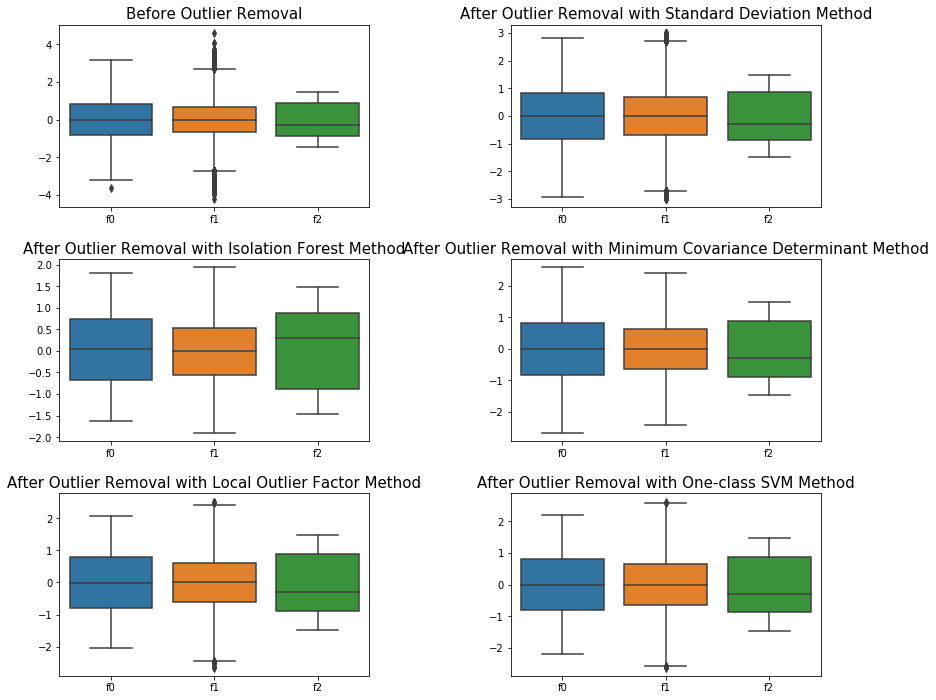

In [27]:
# geo1 dataset
print('geo1 training dataset - number of observations')
plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
sns.boxplot(data=features_train_norm_df1)
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
sns.boxplot(data=features_train_norm_df_std1)
plt.title('After Outlier Removal with Standard Deviation Method', size=15)

plt.subplot(3,2,3)
sns.boxplot(data=features_train_norm_df_iso1)
plt.title('After Outlier Removal with Isolation Forest Method', size=15)

plt.subplot(3,2,4)
sns.boxplot(data=features_train_norm_df_ee1)
plt.title('After Outlier Removal with Minimum Covariance Determinant Method', size=15)

plt.subplot(3,2,5)
sns.boxplot(data=features_train_norm_df_lof1)
plt.title('After Outlier Removal with Local Outlier Factor Method', size=15)

plt.subplot(3,2,6)
sns.boxplot(data=features_train_norm_df_svm1)
plt.title('After Outlier Removal with One-class SVM Method', size=15)

plt.tight_layout(1.7)
plt.show()

In [28]:
# geo2 dataset
print('geo2 training dataset - number of observations')
print('before outlier removal:', features_train_norm_df2.shape[0])
print('after outlier removal')
print('standard deviation method:', features_train_norm_df_std2.shape[0])
print('isolation forest method:', features_train_norm_df_iso2.shape[0])
print('minimum covariance determinant method:', features_train_norm_df_ee2.shape[0])
print('local outlier factor method:', features_train_norm_df_lof2.shape[0])
print('one-class svm method:', features_train_norm_df_svm2.shape[0])

geo2 training dataset - number of observations
before outlier removal: 75000
after outlier removal
standard deviation method: 75000
isolation forest method: 52500
minimum covariance determinant method: 71250
local outlier factor method: 37500
one-class svm method: 69750


geo2 training dataset - number of observations


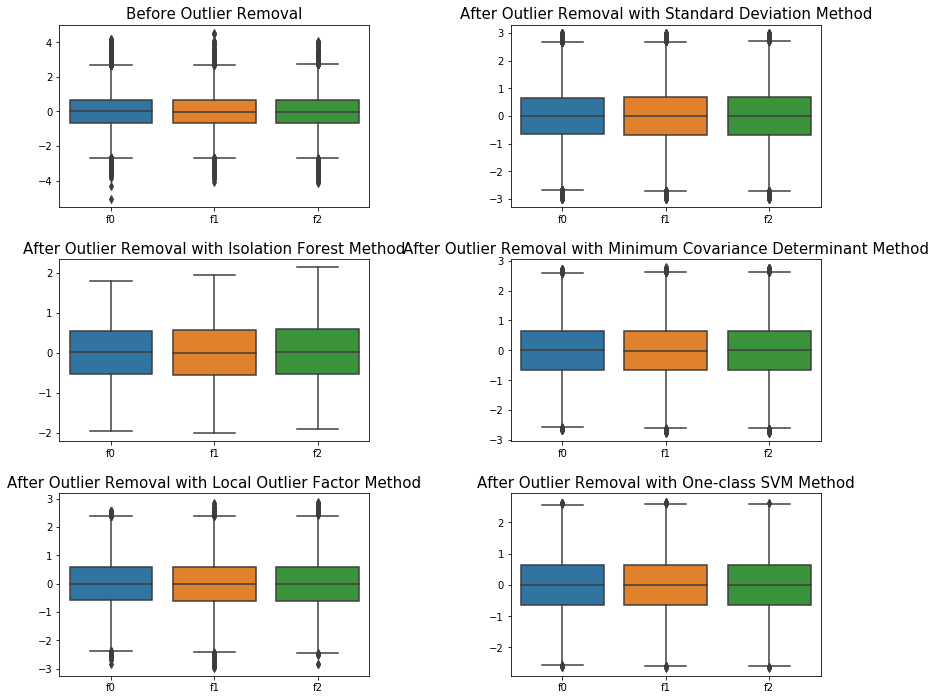

In [29]:
# geo2 dataset
print('geo2 training dataset - number of observations')
plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
sns.boxplot(data=features_train_norm_df2)
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
sns.boxplot(data=features_train_norm_df_std2)
plt.title('After Outlier Removal with Standard Deviation Method', size=15)

plt.subplot(3,2,3)
sns.boxplot(data=features_train_norm_df_iso2)
plt.title('After Outlier Removal with Isolation Forest Method', size=15)

plt.subplot(3,2,4)
sns.boxplot(data=features_train_norm_df_ee2)
plt.title('After Outlier Removal with Minimum Covariance Determinant Method', size=15)

plt.subplot(3,2,5)
sns.boxplot(data=features_train_norm_df_lof2)
plt.title('After Outlier Removal with Local Outlier Factor Method', size=15)

plt.subplot(3,2,6)
sns.boxplot(data=features_train_norm_df_svm2)
plt.title('After Outlier Removal with One-class SVM Method', size=15)

plt.tight_layout(1.7)
plt.show()

* In the Local Outlier Factor method, we can still some outliers left, but we could not go further removing the remaining outliers since the upper limit of the 'contamination' hyperparameter (=0.5) was reached. 
* All in all, the Minimum Covariance Determinant method worked the best, so we will go with this method. 
<br>o In the geo0 and gep1 datasets, the Minimum Covariance Determinant method removed the fewest number of data points and faster without leaving any outliers. 
<br>o In the geo2 dataset, the Minimum Covariance Determinant method removed the fewest number of data points and faster, but the Isolation Forest method removed outliers more thoroughly. 


* The outliers that are removed by the Minimum Covariance Determinant method account for 5% of the dataset in geo0, geo1 and geo2.

<div class="alert alert-info" role="alert">
<b>Note to the Reviewer:</b> 
    
For the geo0 and geo1 datasets, the Minimum Covariance Determinant method performed the best, and for the geo2 dataset, the Isolation Forest method performed the best. I think the same method should be applied to all the datasets to make sure that everything is on an equal footing. 
    
<br>Is this correct or am I allowed to pick and mix methods in order to choose the best method for each dataset?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
I recommend to use the same method for all datasets (after you chose the best one).
</div>

### Conclusion <a class="anchor" id="section_2_4"></a>

[Go back to the Table of Contents](#table_of_contents)

A lot has happened until we got here, so let us tidy things up, going forward. 

Define the training dataset, features and target. The features dataset for training has been standardised and has had outliers removed. 

<div class="alert alert-info" role="alert">
<b>Note to the Reviewer:</b> 

The features dataset prepared for training underwent standardization and outlier removal, but the matching target dataset underwent neither. However, we need to make sure that the target dataset for training will have only those rows that correspond to the features dataset, hence the masking step using [geo0_mask],...etc. 
    
<br>If my understanding is incorrect, please let me know. 
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

In [30]:
# geo0 training dataset
X_train0 = features_train_norm_df_ee0
index0 = features_train_norm_df_ee0.index
y_train0 = target_train0.iloc[index0]

# geo1 training dataset
X_train1 = features_train_norm_df_ee1
index1 = features_train_norm_df_ee1.index
y_train1 = target_train1.iloc[index1]

# geo2 training dataset
X_train2 = features_train_norm_df_ee2
index2 = features_train_norm_df_ee2.index
y_train2 = target_train2.iloc[index2]

Define the validation dataset, features and target. The features dataset for validation has been standardised but still contains outliers.

<div class="alert alert-info" role="alert">
<b>Note to the Reviewer:</b> 

The target dataset for validation did not undergo standardisation.  
    
<br>If my understanding is not correct, please let me know. 
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Please note that it's necessary make standartization of the validation dataset. But please take into account that standardising should be performed after data splitting. 
    
Please see additional materials: https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation, https://stats.stackexchange.com/questions/27627/normalization-prior-to-cross-validation
</div>

In [31]:
# geo0 validation dataset
X_valid0 = features_valid_norm0
y_valid0 = target_valid0

# geo1 validation dataset
X_valid1 = features_valid_norm1
y_valid1 = target_valid1

# geo2 validation dataset
X_valid2 = features_valid_norm2
y_valid2 = target_valid2

## Sanity Check <a class="anchor" id="chapter3"></a>

[Go back to the Table of Contents](#table_of_contents)

**The best constant model**

A dummy regressor is a type of regressor which does not generate any insight about the data but rather makes predictions on the given data using only simple rules. It is used only as a simple baseline for the other regressors i.e. any other regressor is expected to perform better on the given dataset.

Let us use several different evaluation metrics to measure the performance of the dummy and the real regressors from various angles:

* Mean Squared Error (MSE): how well a regression line estimates the actual values
<br>o Judging criteria: should be as close as possible to 0.0
<br>Note: not in the same unit as our target variable

* Root Mean Square Error (RMSE): how concentrated the data points are around the line of best fit 
<br>o Judging criteria: the lower the number, the better the fit the model
<br>Note: an absolute value in the same units of measurement as our target variable

* R-squared (R2): how well a regresion line estimates the mean of the actual data points
<br>o Judging criteria: should be as close as possible to 1.0
<br>Range: -infinity - 1.0 

* Mean Absolute Error (MAE): a measure of errors between paired observations expressing the same data point
<br>o Judging criteria: the smaller the number, the less error there is
<br>Note: an absolute value in the same units of measurement as our target variable

Since R2 is the easiest to understand conceptually, let us evaluate the model performance according to R2. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done :)
</div>

**a) Datasets with no standardisation or outlier removal**

In [32]:
# geo0 dataset
# create and train the model using the geo0 training dataset 
dummyregressor_model0 = DummyRegressor(strategy='mean') 

# train the model
dummyregressor_model0.fit(features_train0, target_train0)

# find the predictions using validation set
dummy_pred0 = dummyregressor_model0.predict(features_valid0)

# evaluate the R2 and RSME of the trained model's performance on the validation dataset
print('geo0')
print('R2:', dummyregressor_model0.score(features_valid0, target_valid0))
print('RMSE:', np.sqrt(mean_squared_error(target_valid0, dummy_pred0)))
print('MSE:', mean_squared_error(target_valid0, dummy_pred0))
print('MAE:', mean_absolute_error(target_valid0, dummy_pred0))
print()


# geo1 dataset
dummyregressor_model1 = DummyRegressor(strategy='mean') 
dummyregressor_model1.fit(features_train1, target_train1)
dummy_pred1 = dummyregressor_model1.predict(features_valid1)
print('geo1')
print('R2:', dummyregressor_model1.score(features_valid1, target_valid1)) # the regression line is a bad fit for the data
print('RMSE:', np.sqrt(mean_squared_error(target_valid1, dummy_pred1)))
print('MSE:', mean_squared_error(target_valid1, dummy_pred1))
print('MAE:', mean_absolute_error(target_valid1, dummy_pred1))
print()


# geo2 dataset
dummyregressor_model2 = DummyRegressor(strategy='mean') 
dummyregressor_model2.fit(features_train2, target_train2)
dummy_pred2 = dummyregressor_model2.predict(features_valid2)
print('geo2')
print('R2:', dummyregressor_model2.score(features_valid2, target_valid2)) # the regression line is a bad fit for the data
print('RMSE:', np.sqrt(mean_squared_error(target_valid2, dummy_pred2)))
print('MSE:', mean_squared_error(target_valid2, dummy_pred2))
print('MAE:', mean_absolute_error(target_valid2, dummy_pred2))

geo0
R2: -0.00016096809891874564
RMSE: 44.289591053907365
MSE: 1961.5678757223516
MAE: 37.67743514015374

geo1
R2: -8.709675856977128e-06
RMSE: 46.02144533725462
MSE: 2117.9734309299147
MAE: 40.37002658996303

geo2
R2: -1.181722384835382e-05
RMSE: 44.90234968510566
MSE: 2016.2210072435087
MAE: 37.92100829387219


**b) Datasets with standardisation and outlier removal**

In [33]:
# geo0 dataset
# create and train the model using the geo0 training dataset 
dummyregressor_model0 = DummyRegressor(strategy='mean') 

# train the model
dummyregressor_model0.fit(X_train0, y_train0)

# find the predictions using validation set
dummy_pred0 = dummyregressor_model0.predict(X_valid0)

# evaluate the R2 and RSME of the trained model's performance on the validation dataset
print('geo0')
print('R2:', dummyregressor_model0.score(features_valid0, target_valid0))
print('RMSE:', np.sqrt(mean_squared_error(target_valid0, dummy_pred0)))
print('MSE:', mean_squared_error(target_valid0, dummy_pred0))
print('MAE:', mean_absolute_error(target_valid0, dummy_pred0))
print()


# geo1 dataset
dummyregressor_model1 = DummyRegressor(strategy='mean') 
dummyregressor_model1.fit(X_train1, y_train1)
dummy_pred1 = dummyregressor_model1.predict(X_valid1)
print('geo1')
print('R2:', dummyregressor_model1.score(features_valid1, target_valid1)) # the regression line is a bad fit for the data
print('RMSE:', np.sqrt(mean_squared_error(target_valid1, dummy_pred1)))
print('MSE:', mean_squared_error(target_valid1, dummy_pred1))
print('MAE:', mean_absolute_error(target_valid1, dummy_pred1))
print()


# geo2 dataset
dummyregressor_model2 = DummyRegressor(strategy='mean') 
dummyregressor_model2.fit(X_train2, y_train2)
dummy_pred2 = dummyregressor_model2.predict(X_valid2)
print('geo2')
print('R2:', dummyregressor_model2.score(features_valid2, target_valid2)) # the regression line is a bad fit for the data
print('RMSE:', np.sqrt(mean_squared_error(target_valid2, dummy_pred2)))
print('MSE:', mean_squared_error(target_valid2, dummy_pred2))
print('MAE:', mean_absolute_error(target_valid2, dummy_pred2))

geo0
R2: -0.0001570072474872397
RMSE: 44.28950335569208
MSE: 1961.5601074938597
MAE: 37.677348330792874

geo1
R2: -1.6349851532648785e-05
RMSE: 46.02162114135124
MSE: 2117.989612478067
MAE: 40.37047297013998

geo2
R2: -0.00014750875303604083
RMSE: 44.905395980017765
MSE: 2016.4945881221956
MAE: 37.92350084724097


* There is a visible improvement in the value of R2 for all three datasets when the datasets do not contain outliers. 
* The set of evaluation metrics in (b) will be used as the benchmark to which the performance of the real model will be compared. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you considered datasets with and without standardisation and outlier removal.
</div>

## Model Training <a class="anchor" id="chapter4"></a>

[Go back to the Table of Contents](#table_of_contents)

We have a regression problem and have some prediction to make on a region with the most productive and profitable oil wells. We will create a linear regression model and evaluate its performance on the validation dataset after having trained it on the training dataset. 

After the training, the model performance will be assessed in terms of R2, RMSE, MSE and MAE. 

**Train the model for each region.**

To evaluate models to use for prediction, we will do so by using cross evaluation to avoid overfitting. 

In [34]:
# Linear regression
# geo0 dataset
# create an instance of the model
lr_model_cv0 = LinearRegression()

# evaluate the model
scores0 = cross_val_score(lr_model_cv0, X_train0, y_train0, scoring='r2', cv=5, n_jobs=-1)
#scores0a, scores0b = cross_validate(lr_model_cv0, X_train0, y_train0, scoring=['r2', 'neg_mean_squared_error'], cv=5, n_jobs=-1)

# report the performance
print('geo0')
print('Average model R2 score:', (mean(scores0)))


# geo0 dataset
lr_model_cv1 = LinearRegression()
scores1 = cross_val_score(lr_model_cv1, X_train1, y_train1, scoring='r2', cv=5, n_jobs=-1)
#scores1a, scores1b = cross_validate(lr_model_cv1, X_train1, y_train1, scoring=['r2', 'neg_mean_squared_error'], cv=5, n_jobs=-1)
print('geo1')
print('Average model R2 score:', (mean(scores1)))


# geo0 dataset
lr_model_cv2 = LinearRegression()
scores2 = cross_val_score(lr_model_cv2, X_train2, y_train2, scoring='r2', cv=5, n_jobs=-1)
#scores2a, scores2b = cross_validate(lr_model_cv2, X_train2, y_train2, scoring=['r2', 'neg_mean_squared_error'], cv=5, n_jobs=-1)
print('geo2')
print('Average model R2 score:', (mean(scores2)))

geo0
Average model R2 score: 0.24515969978024515
geo1
Average model R2 score: 0.9996188053632403
geo2
Average model R2 score: 0.1826200872330298


So this is what we can expect from our linear regression model.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Please note that you can use .format to output only required number of decimal places (https://pyformat.info/).
</div>

**Make predictions for the validation set for each region.** 

Save the predictions and correct answers for the validation set.
<br>Print the average volume of predicted reserves and model RMSE.

In [35]:
# geo0 dataset
lr_model0 = LinearRegression()
lr_model0.fit(X_train0, y_train0)
lr_pred0 = lr_model0.predict(X_valid0)
print('geo0')
print('R2:', lr_model0.score(X_valid0, y_valid0)) 
print('RMSE:', np.sqrt(mean_squared_error(y_valid0, lr_pred0)))
print('MSE:', mean_squared_error(y_valid0, lr_pred0))
print('MAE:', mean_absolute_error(y_valid0, lr_pred0))
print('Average volume of predicted reserves:', mean(lr_pred0))
print()

# geo1 dataset
lr_model1 = LinearRegression()
lr_model1.fit(X_train1, y_train1)
lr_pred1 = lr_model1.predict(X_valid1)
print('geo1')
print('R2:', lr_model1.score(X_valid1, y_valid1)) 
print('RMSE:', np.sqrt(mean_squared_error(y_valid1, lr_pred1)))
print('MSE:', mean_squared_error(y_valid1, lr_pred1))
print('MAE:', mean_absolute_error(y_valid1, lr_pred1))
print('Average volume of predicted reserves:', mean(lr_pred1))
print()

# geo2 dataset
lr_model2 = LinearRegression()
lr_model2.fit(X_train2, y_train2)
lr_pred2 = lr_model2.predict(X_valid2)
print('geo2')
print('R2:', lr_model2.score(X_valid2, y_valid2)) 
print('RMSE:', np.sqrt(mean_squared_error(y_valid2, lr_pred2)))
print('MSE:', mean_squared_error(y_valid2, lr_pred2))
print('MAE:', mean_absolute_error(y_valid2, lr_pred2))
print('Average volume of predicted reserves:', mean(lr_pred2))

geo0
R2: 0.2794993087471461
RMSE: 37.59100356501335
MSE: 1413.0835490248467
MAE: 30.864016051721332
Average volume of predicted reserves: 92.5274451523886

geo1
R2: 0.999622840317215
RMSE: 0.8937601635810101
MSE: 0.7988072300043539
MAE: 0.717718822593861
Average volume of predicted reserves: 68.72873298339196

geo2
R2: 0.20520067129105635
RMSE: 40.03089015140321
MSE: 1602.4721663137109
MAE: 32.76309603789989
Average volume of predicted reserves: 94.30284659908124


**Analyze the results.**

* We saw earlier in the EDA the mean values below:
<br>o geo0 - 92.500000
<br>o geo1 - 68.825000
<br>o geo2 - 95.000000

The average volumes of predicted reserves for the three regions are pretty close to the above figures. 

* The RMSE for the geo1 region predictions is very small at 0.89, which is excellent news. Together with the R2 practically reaching 1.0 and the MAE being so low, we can say that the model has managed to find an great line of best fit. 
<br>For the other two regions, geo0 and geo2, the model seems to be struggling to make good predictions. The RMSE is indicating a 40.62% (=37.59/92.53) and 42.45% (=40.03/94.30) probability of error, compared to the average volume for geo0 and geo2, respectively. The R2 is also far from reaching the golden "1.0" score that we should strive for, telling us the line is not much of a good fit, which we can see from the MAE values that the difference between the actual data point and its prediction is about 30 units apart. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

## Preparation for Profit Calculation <a class="anchor" id="chapter5"></a>

[Go back to the Table of Contents](#table_of_contents)

**Store all key values for calculations in separate variables.**

In [36]:
# the cost of developing an oil well in USD
well_dev_cost=100000000

# the revenue from 1 barrel of raw materials in USD
revenue_per_barrel=4.5

# the revenue from 1 unit of 'product' in USD where the values in 'product' are in units of 1000 barrels
revenue_per_unit_product=4500

**Calculate the volume of reserves sufficient for developing a new well
without losses.**

Let us calculate the break-even point where the sales revenue equals the costs. Since no information is provided, we will not take operational costs into account. 

In [37]:
min_vol_reserves_no_loss = well_dev_cost/revenue_per_unit_product
print('The minimum volume of reserves required to develop a new well without losses is', min_vol_reserves_no_loss, 'units of product.')

The minimum volume of reserves required to develop a new well without losses is 22222.222222222223 units of product.


**Compare the obtained value with the average volume of
reserves in each region.**

In [38]:
# geo0
avg_vol_pred_reserves_geo0=92.5274451523886
n_wells_required_geo0 =round(min_vol_reserves_no_loss/avg_vol_pred_reserves_geo0, 0)
print('Minimum number of wells necessary to break even:')
print('region geo0:', n_wells_required_geo0)

# geo1
avg_vol_pred_reserves_geo1=68.72873298339196
n_wells_required_geo1 = round(min_vol_reserves_no_loss/avg_vol_pred_reserves_geo1, 0)
print('region geo1:', n_wells_required_geo1)

# geo2
avg_vol_pred_reserves_geo2=94.30284659908124
n_wells_required_geo2 = round(min_vol_reserves_no_loss/avg_vol_pred_reserves_geo2, 0)
print('region geo2:', n_wells_required_geo2)

Minimum number of wells necessary to break even:
region geo0: 240.0
region geo1: 323.0
region geo2: 236.0


**Provide the findings about the preparation for profit calculation step.**

* The geo2 region has the largest volume of predicted reserves per well, so OilyGiant will be able to break even if they were to develop 236 wells in the region. 
* In geo0 and geo1 regions, the company will need to develop 240 and 323 wells, respectively. 

<div class="alert alert-info" role="alert">
<b>Note to the Reviewer:</b>
    
The second point in the "Conditions" says, "When exploring the region, a study of 500 points is carried with picking
the best **200** points for the profit calculation." 
    
    
Does this mean that the minimum number of wells necessary to break even should be less than 200 and therefore my linear regressor is predicting incorrect average volume of reserves? 

</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
No, it doesn't mean. It mean that we can't choose points randomly.
</div>

## Write a function to calculate profit from a set of selected oil wells and model predictions. <a class="anchor" id="chapter6"></a>

[Go back to the Table of Contents](#table_of_contents)

**Pick the wells with the highest values of predictions. The number of wells depends on the budget and cost of developing one oil well.**
<br>**Summarize the target volume of reserves in accordance with these predictions.**

Development budget = 100000000 # 100 million USD

Minimum number of wells necessary to break even:
<br>region geo0: 240.0
<br>region geo1: 323.0
<br>region geo2: 236.0

Note: the above figures are based on the average volume of predicted reserves per well.

In [39]:
def calc_profit(target_vol, predicted_vol, count):
    target_index = target_vol.index # extract the indices of the target series
    preds = pd.Series(predicted_vol) # convert an array to a series
    preds.index = target_index # associate the predicted values to the target values by the indices
    preds_sorted = preds.sort_values(ascending=False) 
        
    # pick the wells with the highest values of predictions
    selected = target_vol[preds_sorted.index].head(count)
    return (selected).sum(), (4500 * selected).sum() 

In [40]:
# geo0 region
n_wells_geo0=240 # or 200?
target0=y_valid0
predictions0=lr_pred0
volume_geo0, profit_geo0 = calc_profit(target0, predictions0, n_wells_geo0)

# geo1 region
n_wells_geo1=323 # or 200?
target1=y_valid1
predictions1=lr_pred1
volume_geo1, profit_geo1 = calc_profit(target1, predictions1, n_wells_geo1)

# geo2 region
n_wells_geo2=236 # or 200?
target2=y_valid2
predictions2=lr_pred2
volume_geo2, profit_geo2 = calc_profit(target2, predictions2, n_wells_geo2)

# print out the results
print('region geo0: target volume of reserves (units of product):', volume_geo0, ', estimated profit (USD): {:.2f}' .format(profit_geo0))
print('region geo1: target volume of reserves (units of product):', volume_geo1, ', estimated profit (USD): {:.2f}' .format(profit_geo1))
print('region geo2: target volume of reserves (units of product):', volume_geo2, ', estimated profit (USD): {:.2f}' .format(profit_geo2))

region geo0: target volume of reserves (units of product): 35297.505363121476 , estimated profit (USD): 158838774.13
region geo1: target volume of reserves (units of product): 44556.36670031253 , estimated profit (USD): 200503650.15
region geo2: target volume of reserves (units of product): 33229.24327515518 , estimated profit (USD): 149531594.74


<div class="alert alert-info" role="alert">
<b>Note to the Reviewer:</b>
    
The same question as above - should I be calculating the profit based on **200** wells rather than the numbers I calculated, which are:
    
region geo0: 240.0
<br>region geo1: 323.0
<br>region geo2: 236.0?
    
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
In principle it's possible to use different approaches.
</div>

**Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.**

For a budget of 100 million USD, we need a minimum of 22222.222222222223 units of product just to break even - anything above that will turn into a profit. 

According to our predictions, the most productive wells in each of the three regions are estimated to produce the volume of reserves shown below in the order of potential. The estimated profit, calculated on the basis of the estimated volumes of reserves are quoted to the right. 

1. region geo1: target volume of reserves (units of product): 44556.36670031253 , estimated profit (USD): 200,503,650.15
2. region geo0: target volume of reserves (units of product): 35297.505363121476 , estimated profit (USD): 158,838,774.13
3. region geo2: target volume of reserves (units of product): 33229.24327515518 , estimated profit (USD): 149,531,594.74

In conclusion, the geo1 region looks the most promising. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, the geo1 region seems to be the better region.
</div>

## Calculate risks and profit for each region. <a class="anchor" id="chapter7"></a>

[Go back to the Table of Contents](#table_of_contents)

**Use the bootstrap technique with 1000 samples to find the distribution of profit.**

When exploring the region, a study of 500 points (oil wells) is carried with picking
the best 200 points for the profit calculation.

In [41]:
def calc_profit_risk(target_vol, predicted_vol, n_iters, s_size, n_tops, quant):

        target_index = target_vol.index # extract the indices of the target series
        preds = pd.Series(predicted_vol) # convert an array to a series
        preds.index = target_index # associate the predicted values to the target values by the indices
    
        state = np.random.RandomState(12345)
    
        values = []
        for i in range(n_iters):
        
            # When forming subsamples, extract the objects with the same indices from target and predictions 
            target_subsample = target_vol.sample(s_size, random_state=state, replace=True) # 1000 samples with 500 observations each
            preds_subsample = preds[target_subsample.index] 
        
            # estimate the profit            
            volume, profit = calc_profit(target_subsample, preds_subsample, n_tops) # take the top 200 observations out of the 500
            values.append(profit)
        
        values = pd.Series(values) # convert the array to a series
        lower = values.quantile(quant)
        confidence_interval = st.t.interval(0.95, len(values)-1, loc=values.mean(), scale=st.sem(values))
        mean = values.mean()
        neg_profit_margin = (well_dev_cost-mean)/mean*100
        return values, mean, lower, confidence_interval, neg_profit_margin

**Find average profit, 95% confidence interval and risk of losses. Loss is negative profit.**

To find 95% confidence interval, drop 100-95=5/2=2.5% of the largest values. The point where 2.5% of the smallest values ends is 2.5% percentile, and the point where 2.5% of the largest values starts is 97.5% percentile. 

Region: geo0
Average revenue (USD): 104270252.26
95% confidence interval (USD): (104097990.74523862, 104442513.77514438)
Potential revenue of at least: 98932696.17 USD
Negative profit (loss in USD): -4.10 USD


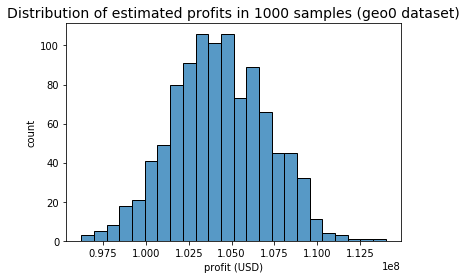

Region: geo1
Average revenue (USD): 105152242.04
95% confidence interval (USD): (105016230.03004321, 105288254.05074584)
Potential revenue of at least: 100688732.25 USD
Negative profit (loss in USD): -4.90 USD


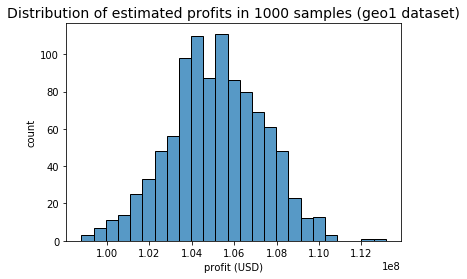

Region: geo2
Average revenue (USD): 104351393.47
95% confidence interval (USD): (104175996.35145701, 104526790.57933496)
Potential revenue of at least: 98743679.93 USD
Negative profit (loss in USD): -4.17 USD


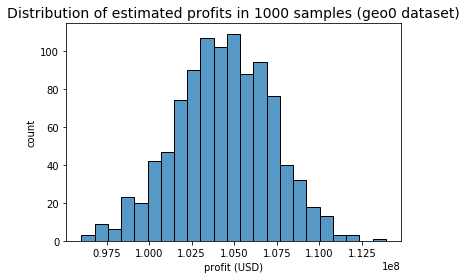

In [42]:
n_iterations=1000 # number of iterations
sample_size = 500 # number of observatsion in each sample
top_num=200 # take the top 200 out of the 500
quantile=0.025 # find the 95% confidence interval - the lower end in the range of possible estimated profits 

# geo0 region
target0=y_valid0
predictions0=lr_pred0
profit_dist0, average0, min_guaranteed_profit0, conf_int0, neg_profit0 = calc_profit_risk(target0, predictions0, n_iterations, sample_size, top_num, quantile)
print("Region: geo0")
print("Average revenue (USD): {:.2f}" .format(average0))
print('95% confidence interval (USD):', conf_int0)
print("Potential revenue of at least: {:.2f}" .format(min_guaranteed_profit0), 'USD')
print("Negative profit (loss in USD): {:.2f}" .format(neg_profit0), 'USD')
sns.histplot(profit_dist0)
plt.title("Distribution of estimated profits in 1000 samples (geo0 dataset)", fontsize=14)
plt.ylabel("count")
plt.xlabel("profit (USD)");
plt.show();


# geo1 region
target1=y_valid1
predictions1=lr_pred1
profit_dist1, average1, min_guaranteed_profit1, conf_int1, neg_profit1 = calc_profit_risk(target1, predictions1, n_iterations, sample_size, top_num, quantile)
print("Region: geo1")
print("Average revenue (USD): {:.2f}" .format(average1))
print('95% confidence interval (USD):', conf_int1)
print("Potential revenue of at least: {:.2f}" .format(min_guaranteed_profit1), 'USD')
print("Negative profit (loss in USD): {:.2f}" .format(neg_profit1), 'USD')
sns.histplot(profit_dist1)
plt.title("Distribution of estimated profits in 1000 samples (geo1 dataset)", fontsize=14)
plt.ylabel("count")
plt.xlabel("profit (USD)");
plt.show();


# geo2 region
target2=y_valid2
predictions2=lr_pred2
profit_dist2, average2, min_guaranteed_profit2, conf_int2, neg_profit2 = calc_profit_risk(target2, predictions2, n_iterations, sample_size, top_num, quantile)
print("Region: geo2")
print("Average revenue (USD): {:.2f}" .format(average2))
print('95% confidence interval (USD):', conf_int2)
print("Potential revenue of at least: {:.2f}" .format(min_guaranteed_profit2), 'USD')
print("Negative profit (loss in USD): {:.2f}" .format(neg_profit2), 'USD')
sns.histplot(profit_dist2)
plt.title("Distribution of estimated profits in 1000 samples (geo0 dataset)", fontsize=14)
plt.ylabel("count")
plt.xlabel("profit (USD)");
plt.show();

**Provide findings: suggest a region for development of oil wells and justify the choice.**

The geo1 region has the highest potential for productivity. Its potential average revenue is the highest of the three as well as the revenue at the lowest end of the range in the worst case scenario. The potential loss is the highest of the three, but the difference is in the units of cents and therefore is negligible. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you clearly analysed distribution of estimated profits and described the best region.
</div>

## Overall Conclusion <a class="anchor" id="chapter8"></a>

[Go back to the Table of Contents](#table_of_contents)

* Because we used a linear regression model, we put a heavy emphasis on preparing the data to raise the learning quality of the model. We removed the minimum necessary number of data points as outliers while still making sure to remove what needs to be removed thoroughly by trying out several methods. We also standardised the datasets, paving the way for the model to be able to digest the data more easily.

* The linear regressor showed the best performance at predicting the per-well volume of reserves on the geo1 region dataset. The R2 was practically hitting 1.0 with an RMSE being below 1.0. The average volume of predicted reserves was very close to the mean value we saw in the descriptive statistics. 

* For the geo0 and geo2 regions, the linear regression showed a rather low performance with R2 values between 0.205 and 0.279. The RMSE was in the range of 37.6-40.03, which means the regression line is around 30-40% off compared to the average volume. 

* With a budget of 100 million USD, we estimated the minimum necessary volume of reserves of approximately 22,222 units of product to break even, which translated to a minimum of 236-323 oil wells. The geo2 region turned out to be most promising in terms of productivity. 

* In conclusion, the model predicts the geo1 region to hold the most potential. 


| 		| 	Average Revenue (USD)	 | 	95% confidence interval (USD)	 | 	Potential revenue of at least	 | 	Loss (USD)	 |
|----------		|----------		|----------		|----------		|----------		 |
| 	geo0	| 	104,270,252.26	 | 	(104097990.74523841, 104442513.77514417)	 | 	98,932,696.17	 | 	-4.10	 |
| 	geo1	| 	105,152,242.04	 | 	(105016230.0300431, 105288254.05074573)	 | 	100,688,732.25	 | 	-4.90	 |
| 	geo2	| 	104,351,393.47	 | 	(104175996.35145703, 104526790.57933497)	 | 	98,743,679.93	 | 	-4.17	 |

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
An excellent conclusion :) Well done that you summarized main results ito the table.
</div>